## Ahmad Soni - 668564

## Nasiem Ayob - 1825850

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# note that missingno doesn't come with anaconda, so install it the first time you run this
!pip install missingno
import missingno
import math
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [3]:
import warnings
warnings.filterwarnings("ignore")

## Attribute Information
1. Id number: 1 to 214
2. RI: refractive index
3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4. Mg: Magnesium
5. Al: Aluminum
6. Si: Silicon
7. K: Potassium
8. Ca: Calcium
9. Ba: Barium
10. Fe: Iron
11. Type of glass: (class attribute)
  - 1: building_windows_float_processed
  - 2: building_windows_non_float_processed
  - 3: vehicle_windows_float_processed
  - 4: vehicle_windows_non_float_processed (none in this database)
  - 5: containers
  - 6: tableware
  - 7: headlamps

In [4]:
columns= ['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'GlassType']
df = pd.read_csv('glass.data', names=columns)

In [5]:
df.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,GlassType
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


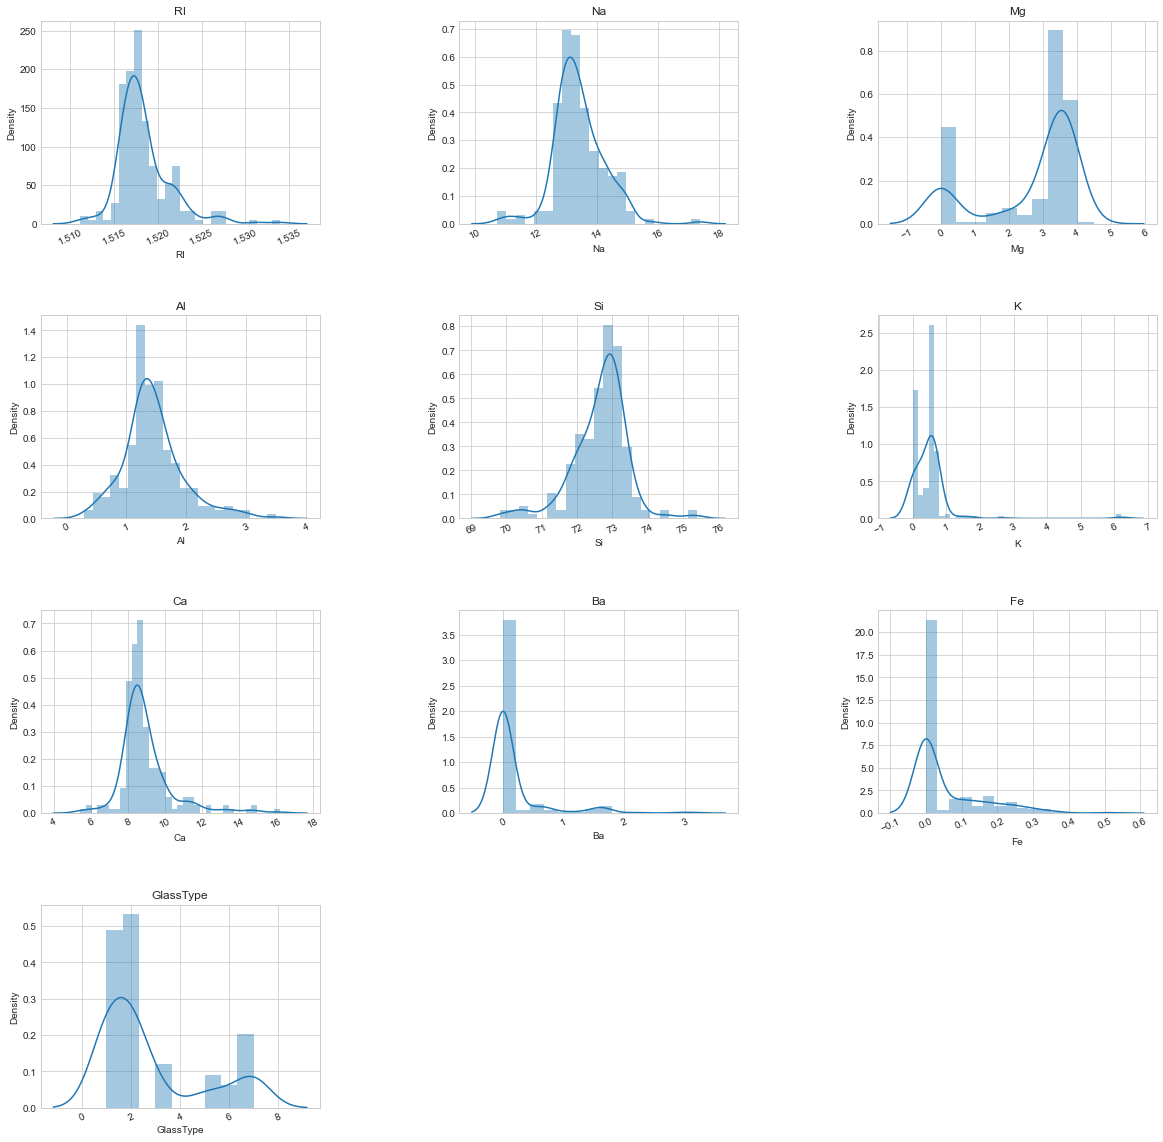

In [32]:
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)
    


cols_to_plot = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba','Fe', 'GlassType']
plot_distribution(df[cols_to_plot], cols=3, width=20, height=20, hspace=0.45, wspace=0.5)

From the above graphs we can see the general distributions of each element. We can see that the Si graph is slightly right skewed and the Na graph is slightly left skewed as examples of skewed data.

Our next course of action is to check if there are any missing values within the dataset

<AxesSubplot:>

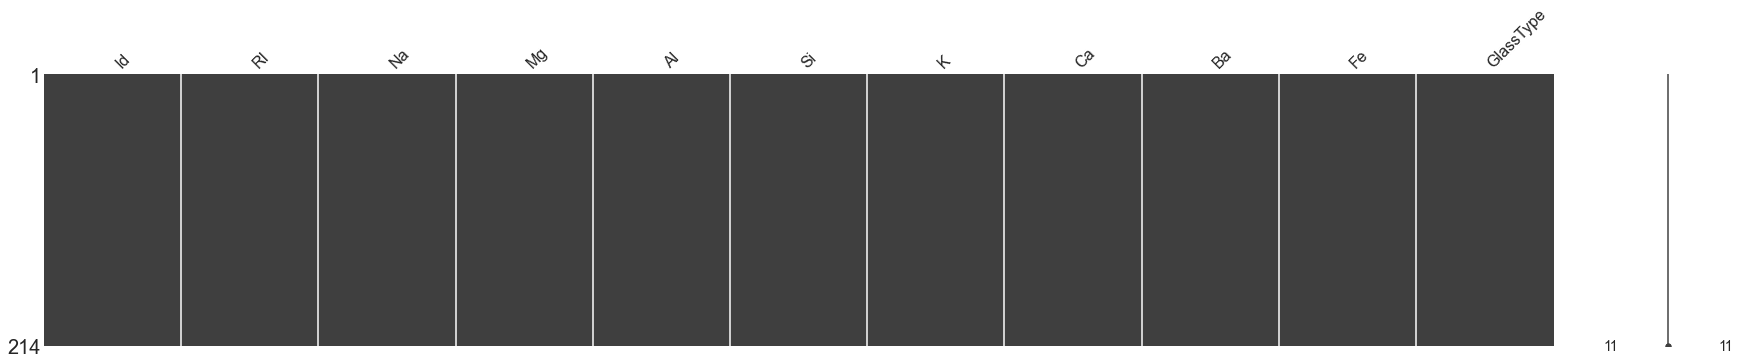

In [5]:
missingno.matrix(df, figsize = (30,5))

Here we can see that there are no missing values in the glass dataset

We will now generate a clustermap and heatmap to understand the correlation between our columns

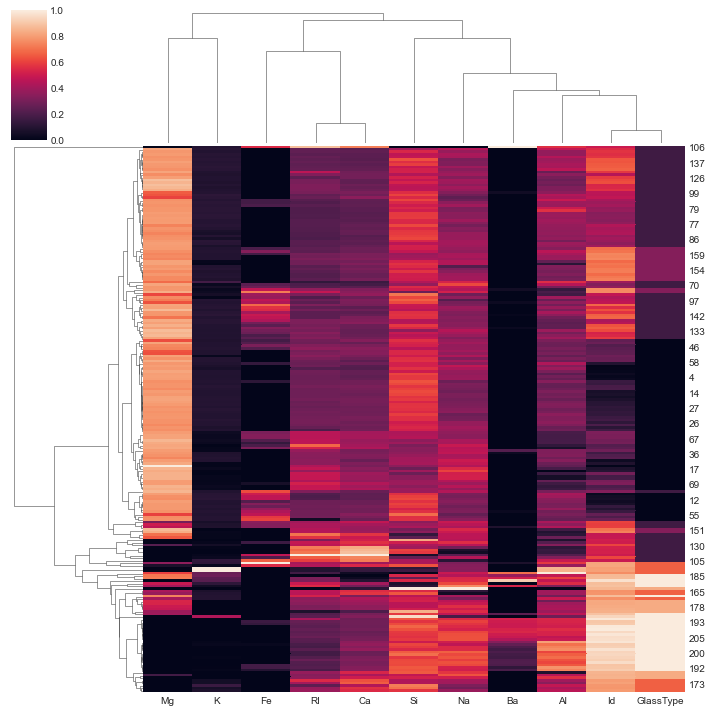

In [6]:
sns.clustermap(df, metric="correlation", standard_scale=1)

<AxesSubplot:>

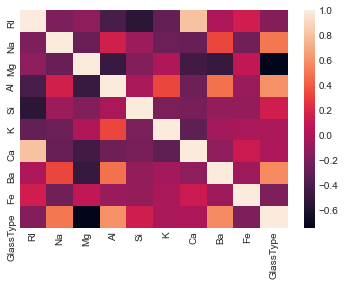

In [7]:
sns.heatmap(df[['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba','Fe', 'GlassType']].corr())

From this heatmap we can see relationships represented by colours, lighter colours indicating stronger correlations. For example Ca and RI have quite a strong correlation, indicating some kind of relationship between them. The diagonal will always be a true relationship as it compares the elements with themselves.

We will now generate a dendogram to investigate if there is a hierarchical relationship between certain objects.

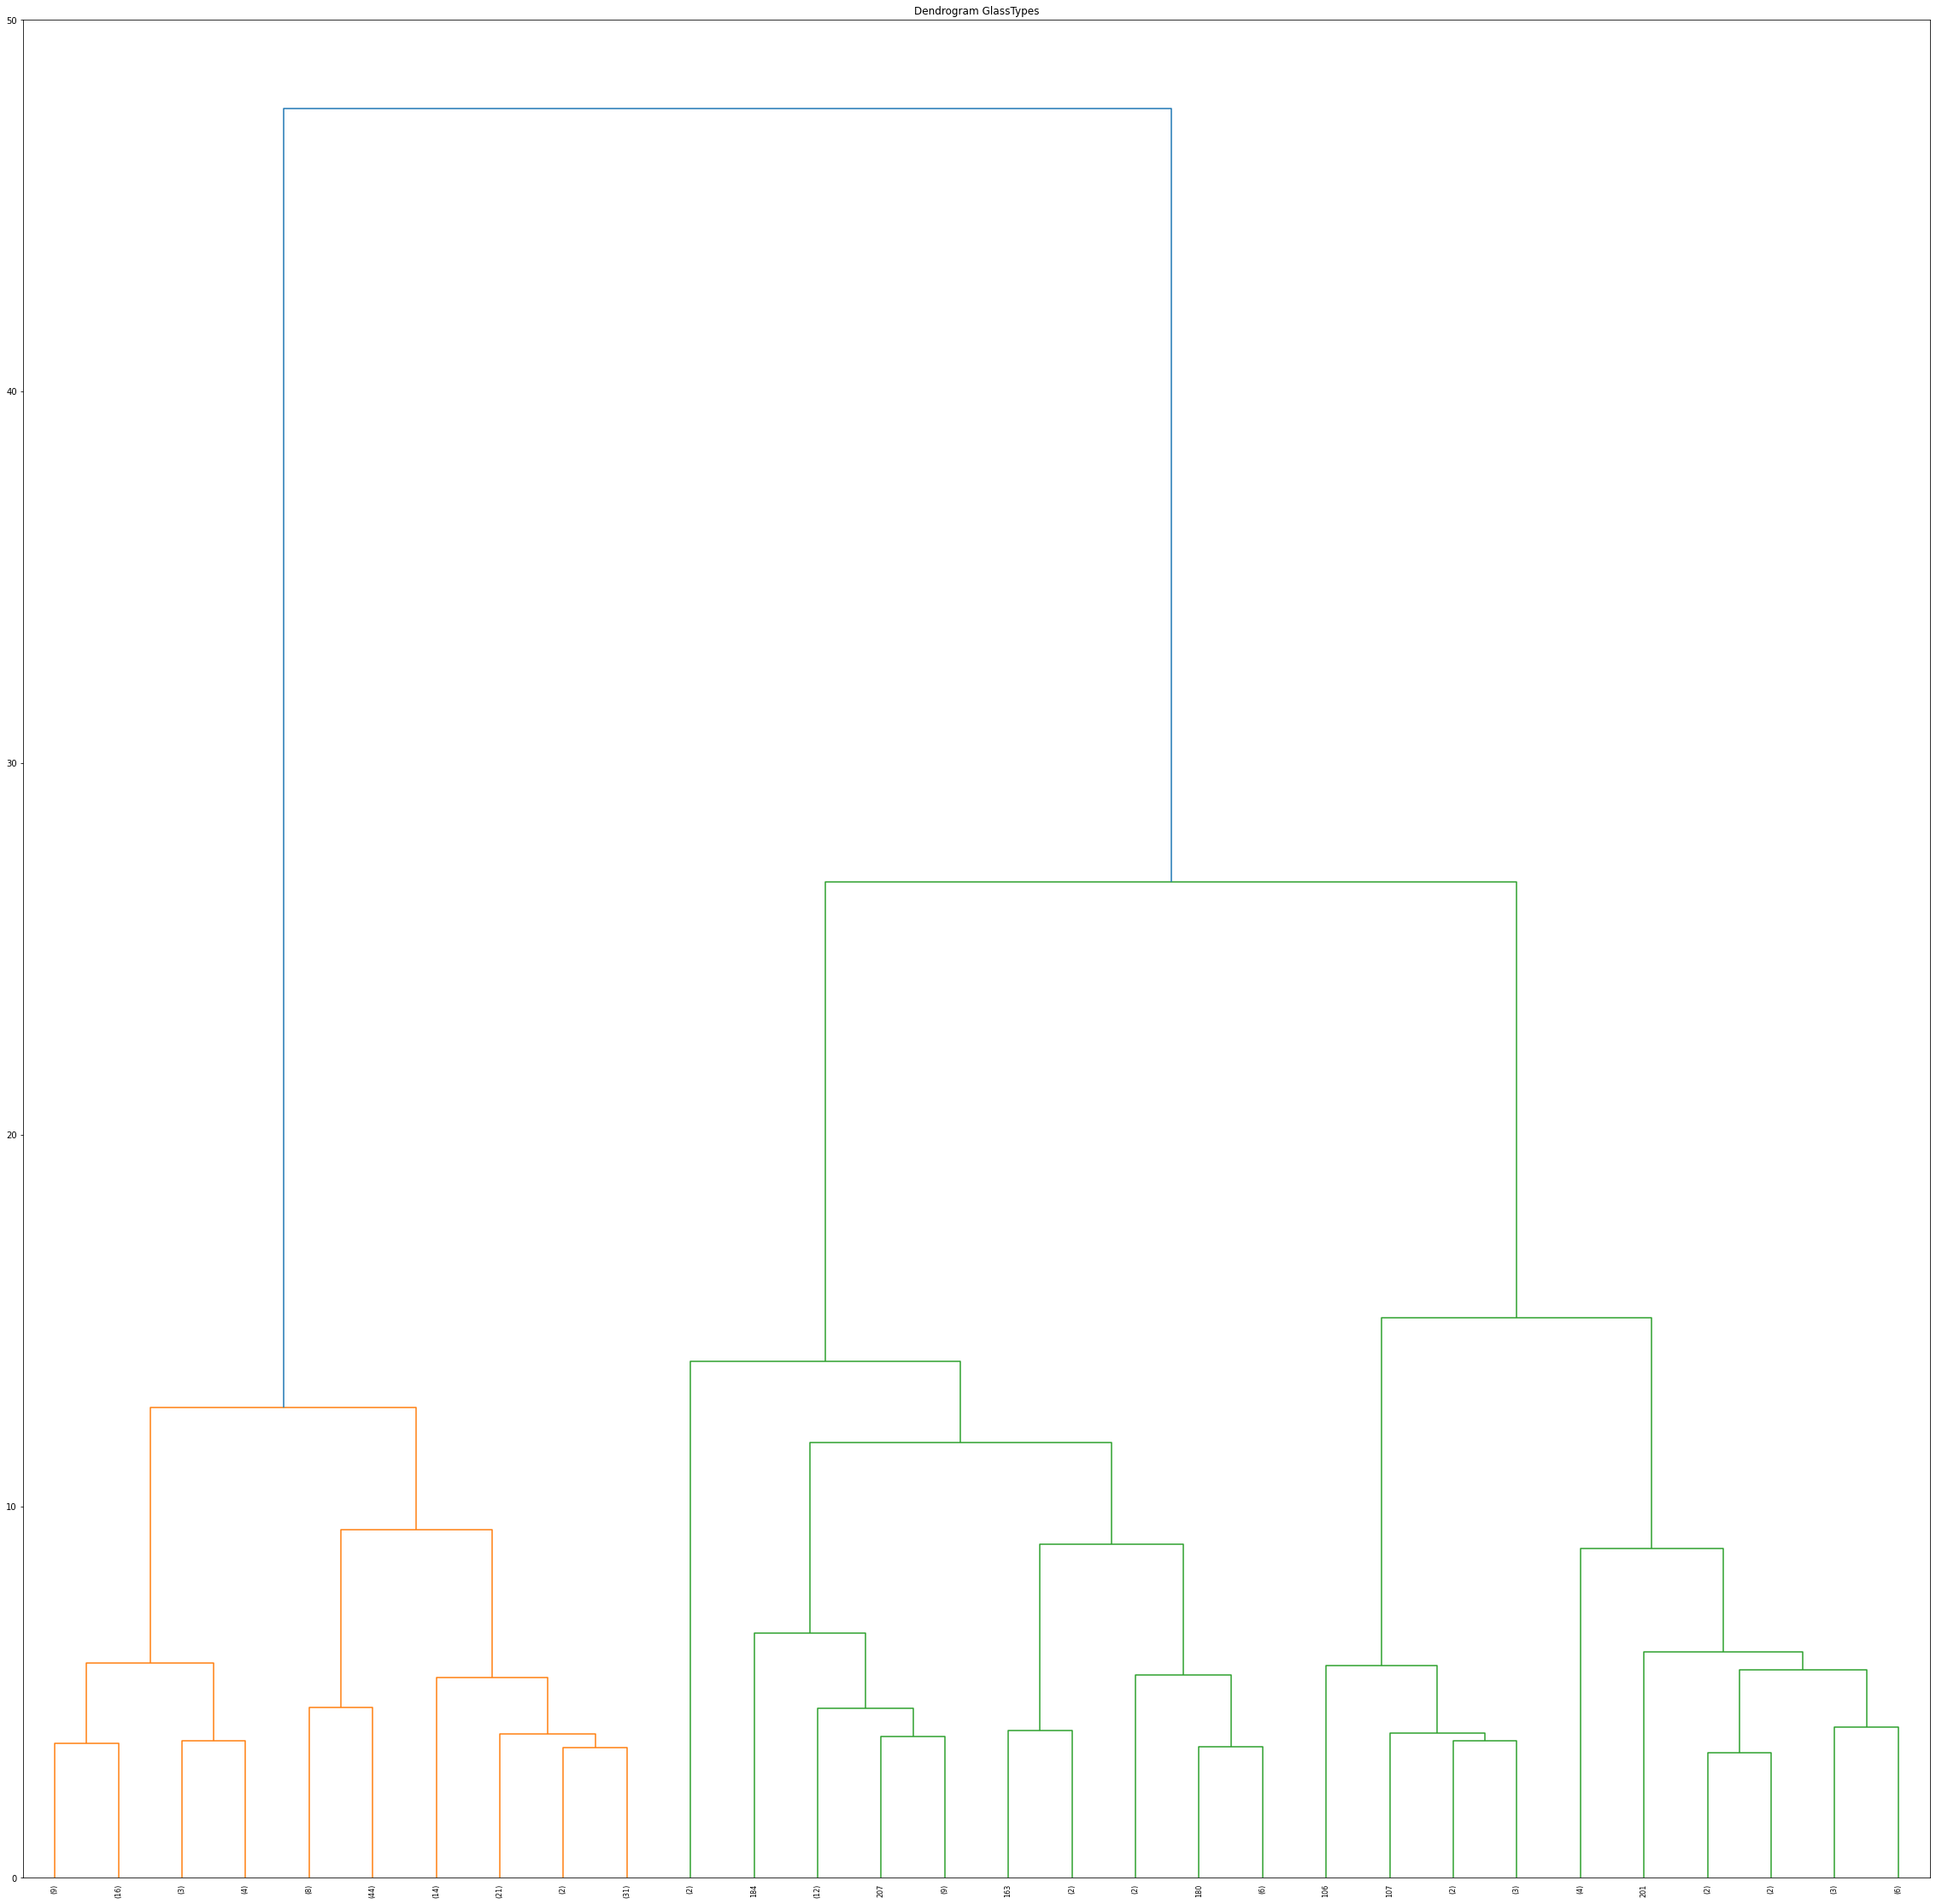

In [6]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(40,40))
plt.title('Dendrogram GlassTypes')
dfc = df[['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba','Fe', 'GlassType']]
#dfc.dropna(inplace=True)

dend = shc.dendrogram(shc.linkage(dfc, method='ward'),
                     leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8., truncate_mode='lastp')

Generate a pairplot between all variables to understand the relationships between them better

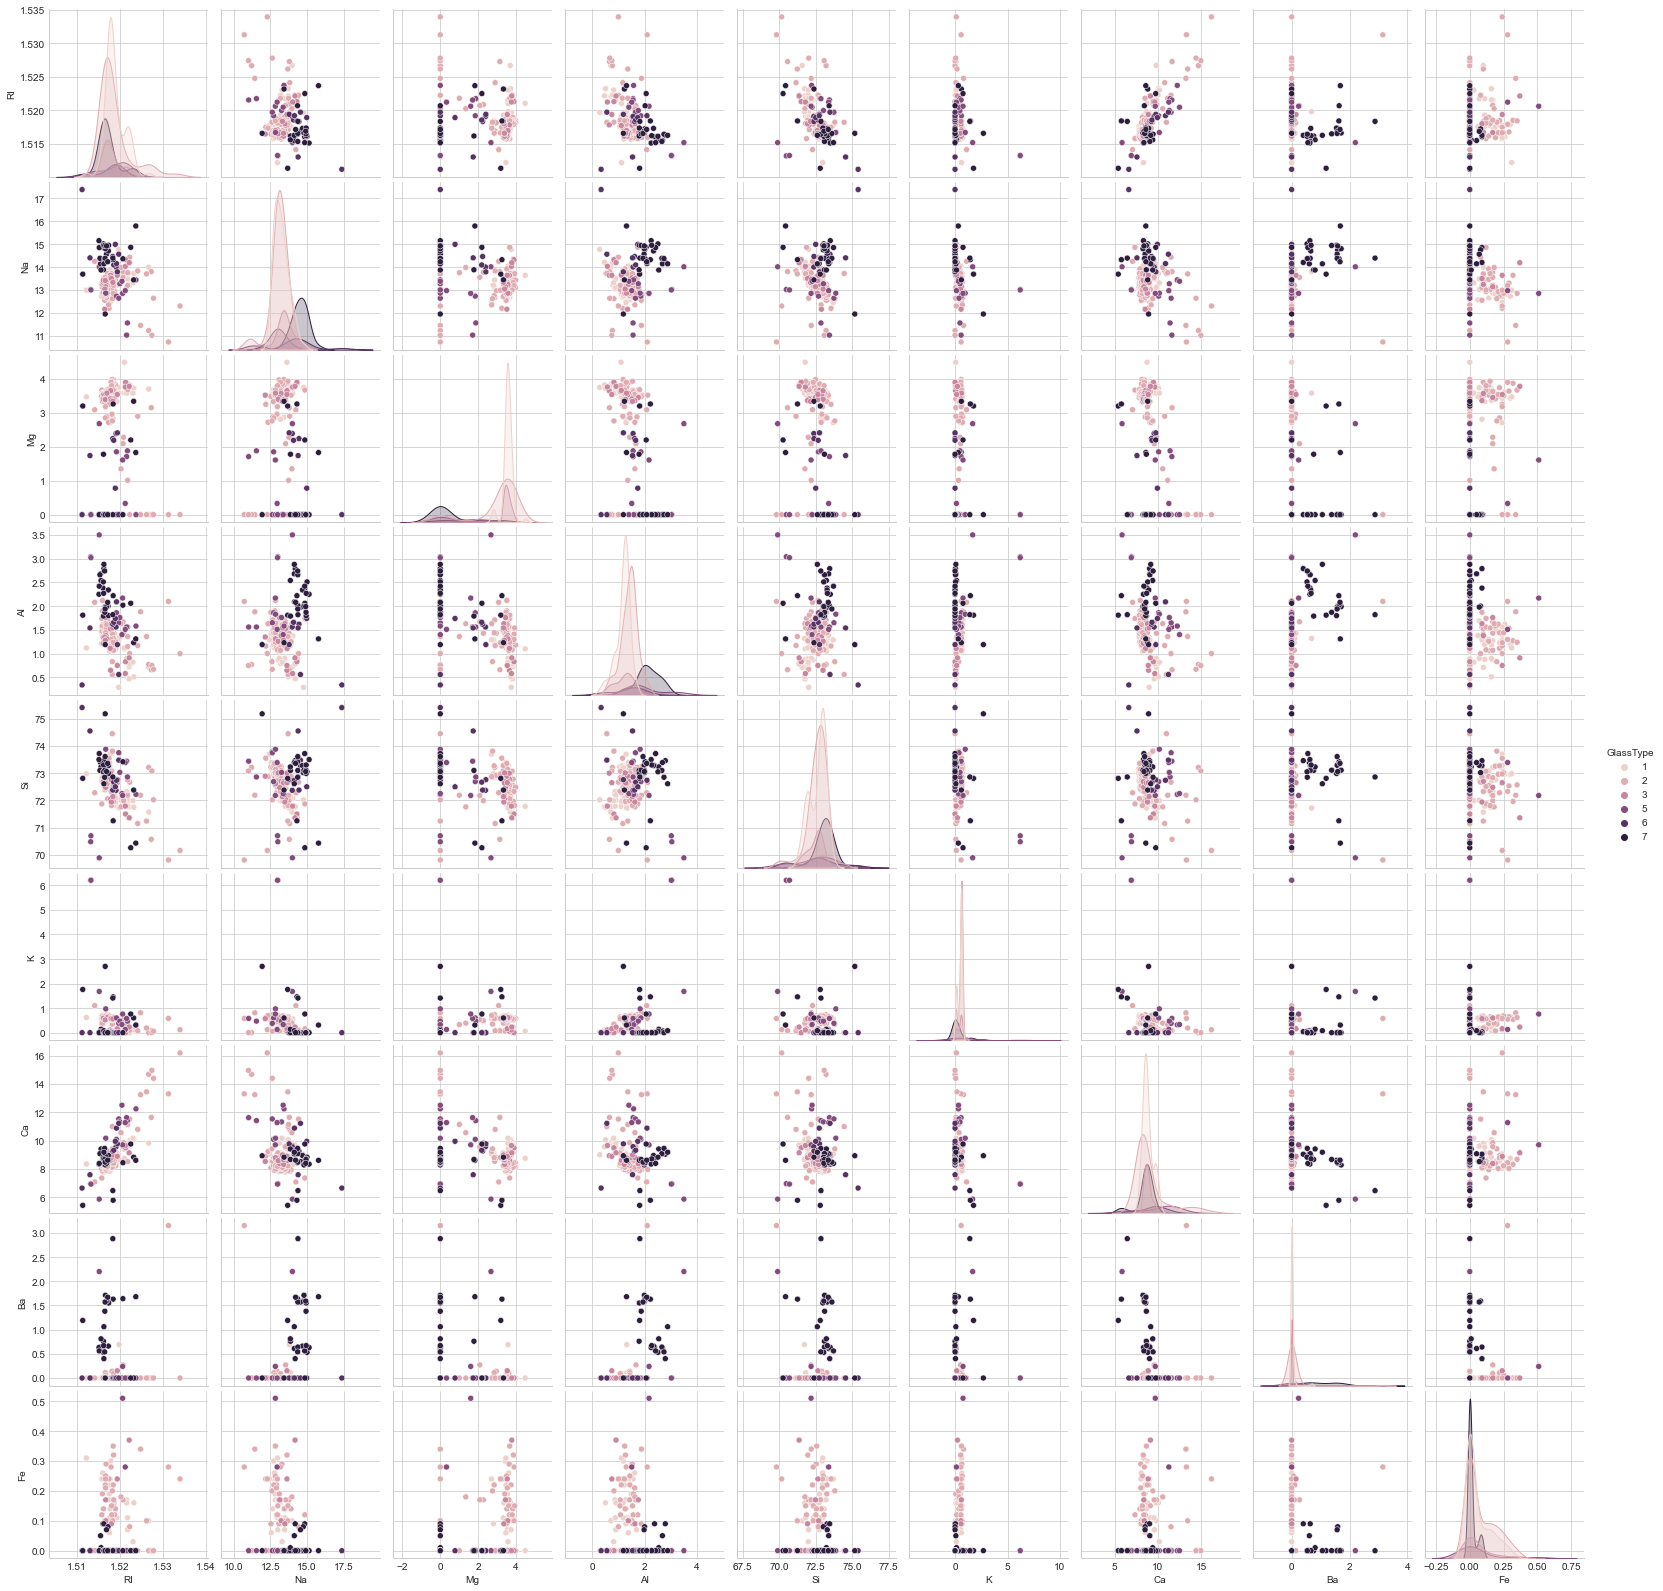

In [33]:
sns.pairplot(df[['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba','Fe', 'GlassType']], hue="GlassType")


Generate violinplots of all elements of glass against glasstype to see  which type of glass have more or less of each element

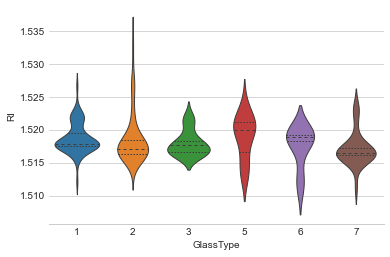

In [10]:
sns.violinplot(data=df[df.GlassType.notnull()], x="GlassType", y="RI", 
               split=True, inner="quart", linewidth=1,)
sns.despine(left=True)

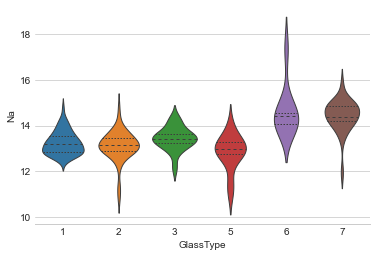

In [11]:
sns.violinplot(data=df[df.GlassType.notnull()], x="GlassType", y="Na", 
               split=True, inner="quart", linewidth=1,)
sns.despine(left=True)

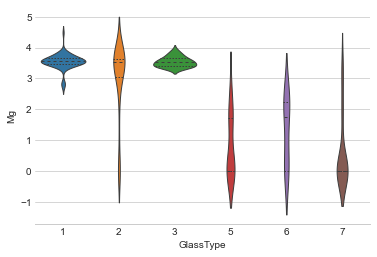

In [12]:
sns.violinplot(data=df , x="GlassType", y="Mg", 
               split=True, inner="quart", linewidth=1,)
sns.despine(left=True)

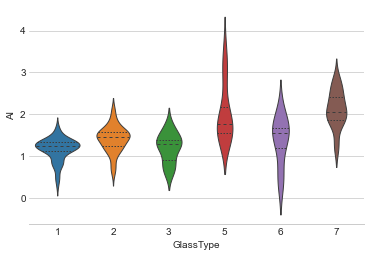

In [13]:
sns.violinplot(data=df[df.GlassType.notnull()], x="GlassType", y="Al", 
               split=True, inner="quart", linewidth=1,)
sns.despine(left=True)

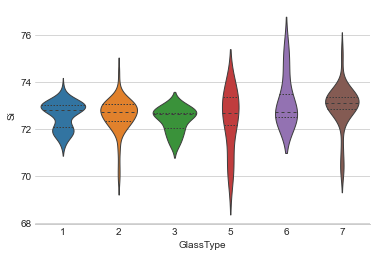

In [14]:
sns.violinplot(data=df[df.GlassType.notnull()], x="GlassType", y="Si", 
               split=True, inner="quart", linewidth=1,)
sns.despine(left=True)

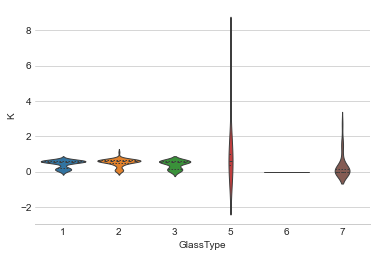

In [15]:
sns.violinplot(data=df[df.GlassType.notnull()], x="GlassType", y="K", 
               split=True, inner="quart", linewidth=1,)
sns.despine(left=True)

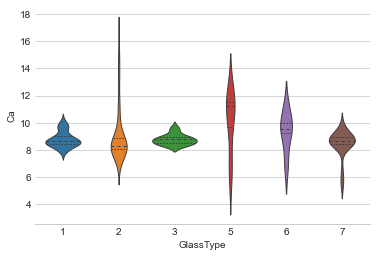

In [16]:
sns.violinplot(data=df[df.GlassType.notnull()], x="GlassType", y="Ca", 
               split=True, inner="quart", linewidth=1,)
sns.despine(left=True)

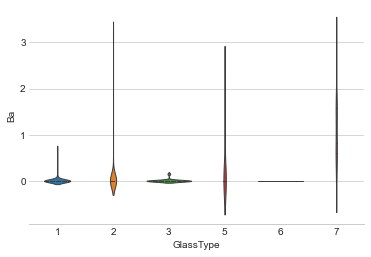

In [17]:
sns.violinplot(data=df[df.GlassType.notnull()], x="GlassType", y="Ba", 
               split=True, inner="quart", linewidth=1,)
sns.despine(left=True)

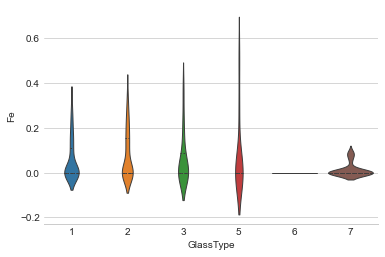

In [18]:
sns.violinplot(data=df[df.GlassType.notnull()], x="GlassType", y="Fe", 
               split=True, inner="quart", linewidth=1,)
sns.despine(left=True)

### Outliers

Generating another pairplot, this time including clustering so we can spot outliers

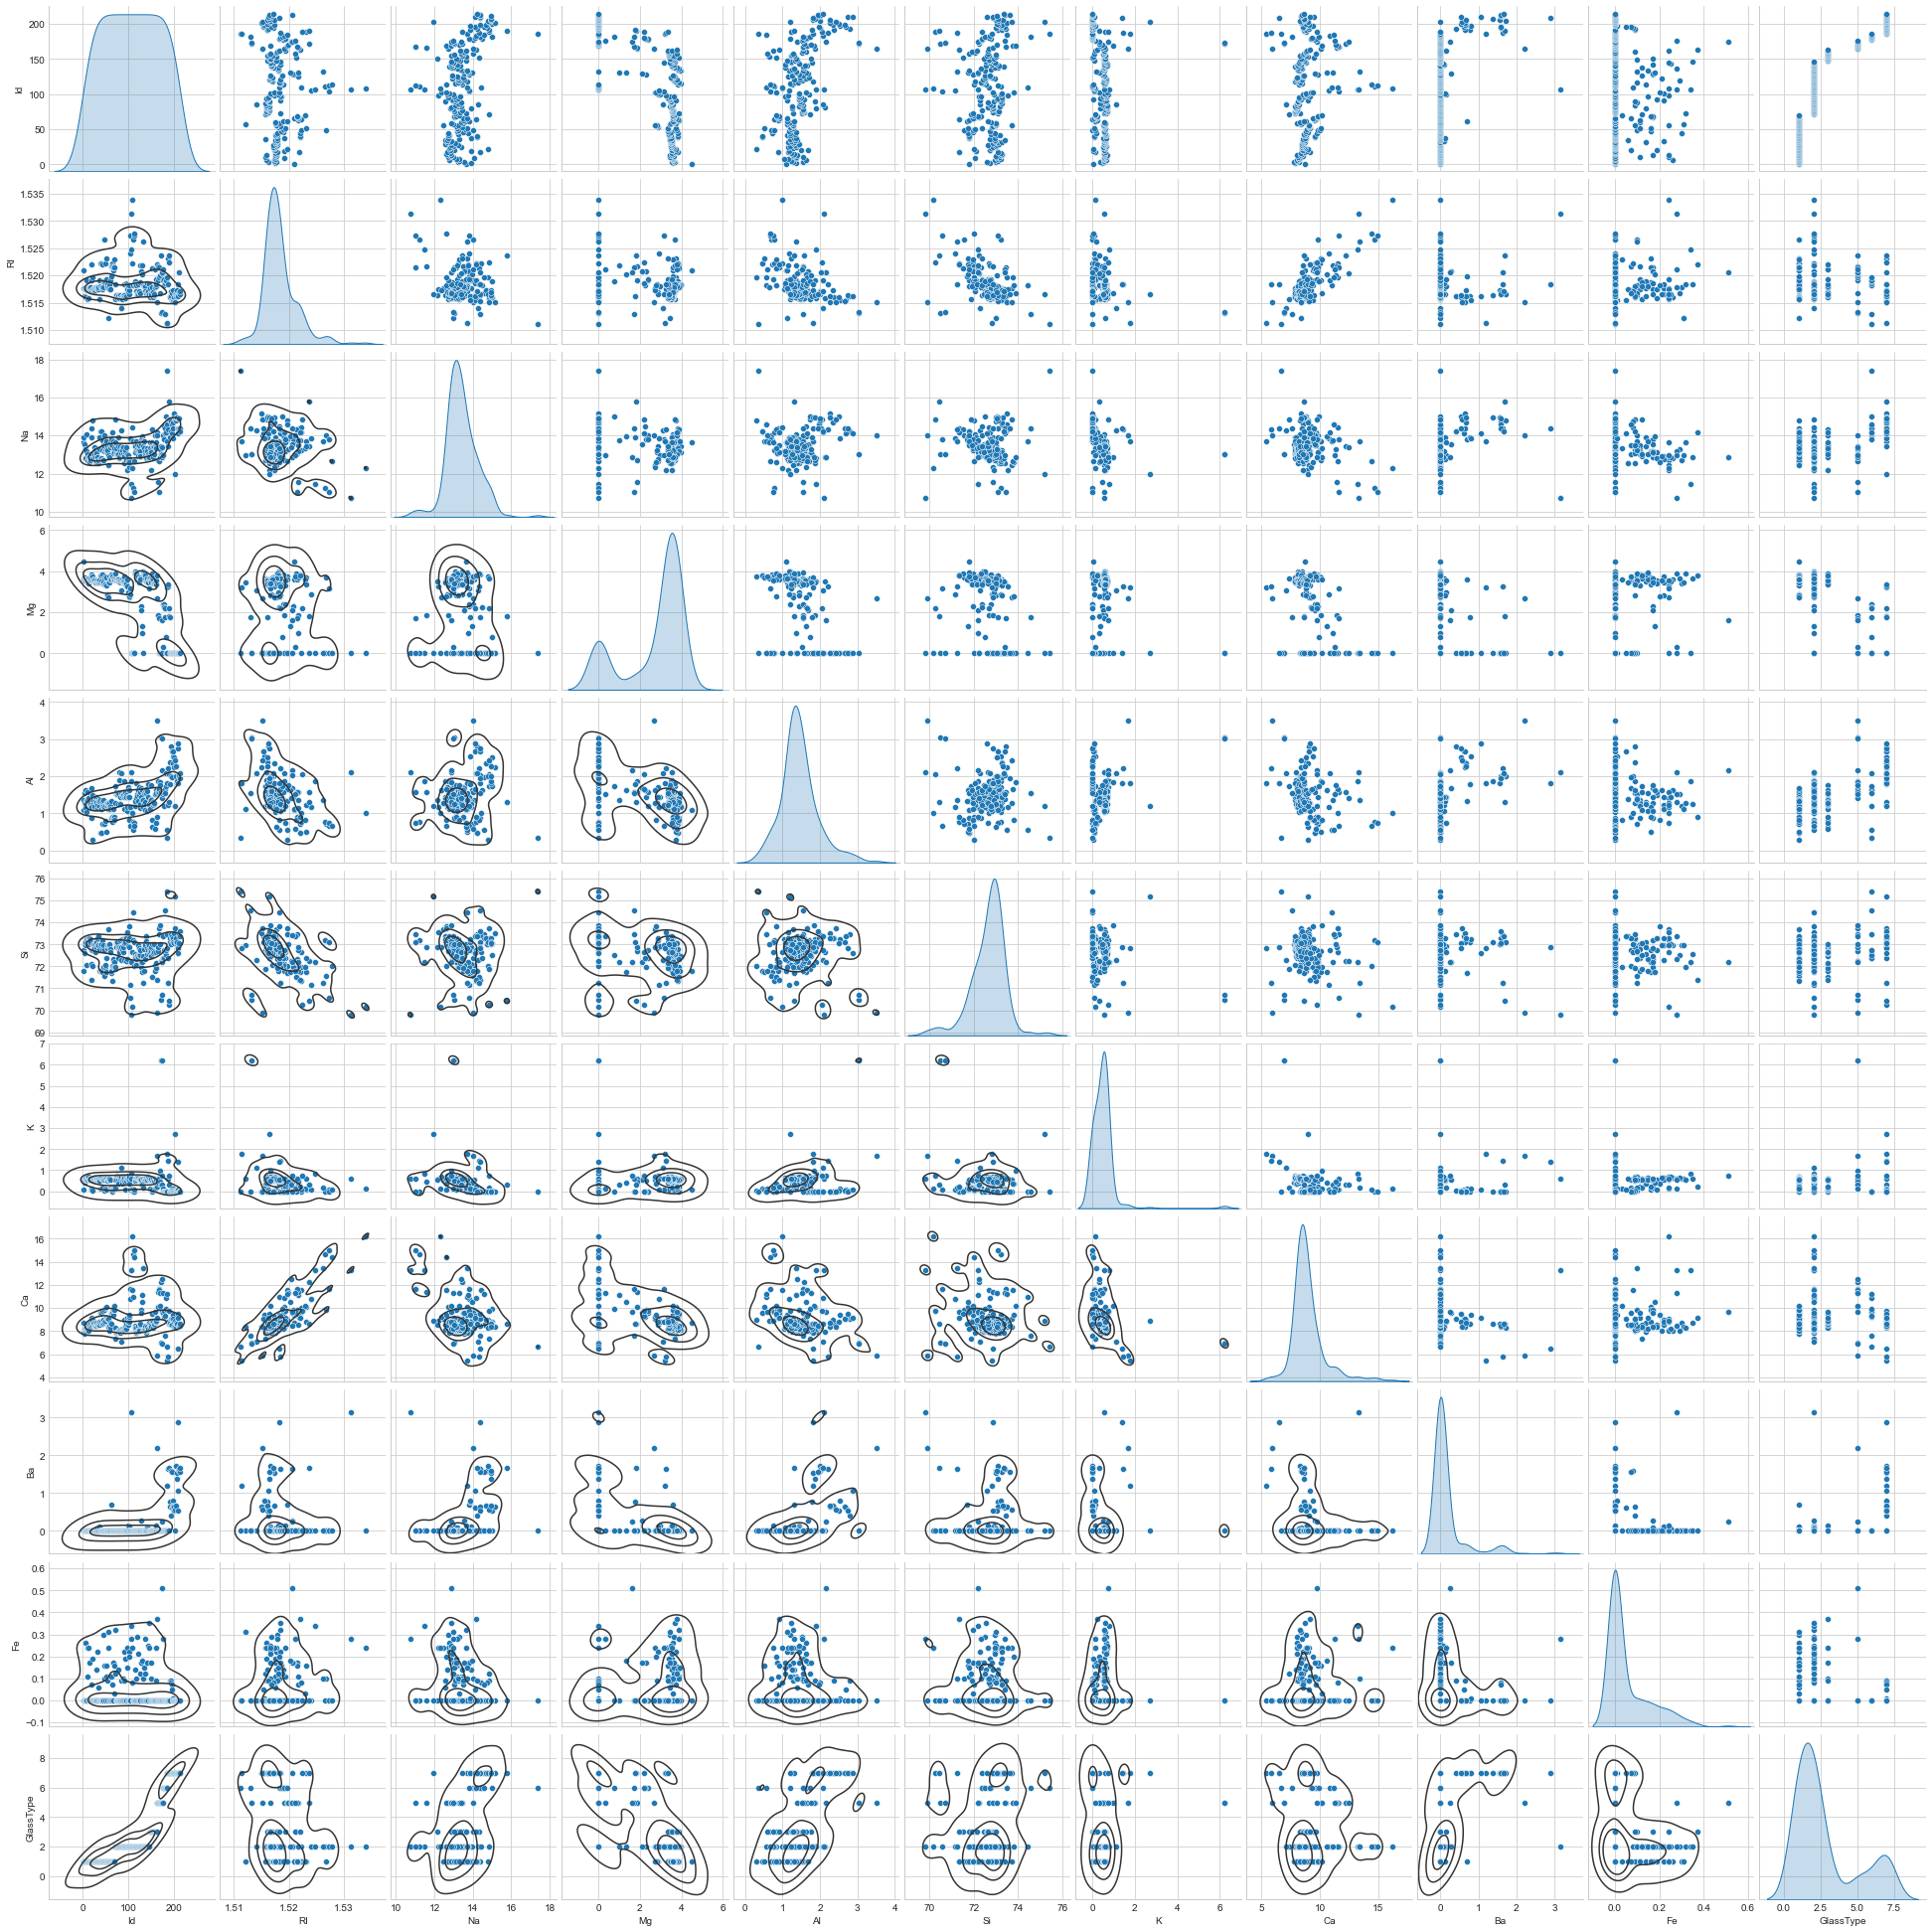

In [19]:
g = sns.pairplot(df, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")

Additionally generating box and whisker plots for all elements to identify outliers

<AxesSubplot:xlabel='RI'>

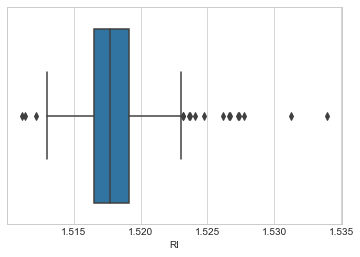

In [20]:
sns.boxplot(x=df['RI'])

<AxesSubplot:xlabel='Na'>

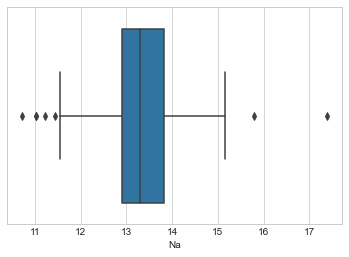

In [21]:
sns.boxplot(x=df['Na'])

<AxesSubplot:xlabel='Mg'>

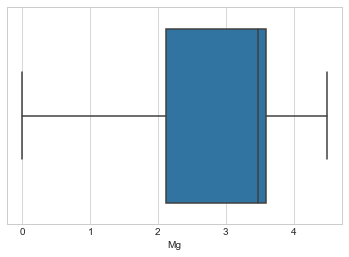

In [22]:
sns.boxplot(x=df['Mg'])

<AxesSubplot:xlabel='Al'>

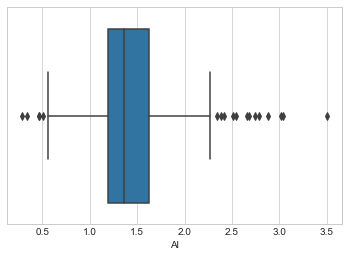

In [23]:
sns.boxplot(x=df['Al'])

<AxesSubplot:xlabel='Si'>

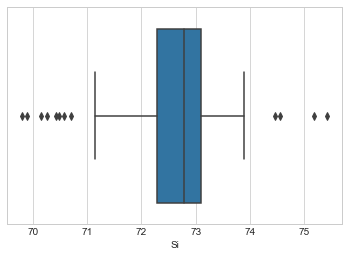

In [24]:
sns.boxplot(x=df['Si'])

<AxesSubplot:xlabel='K'>

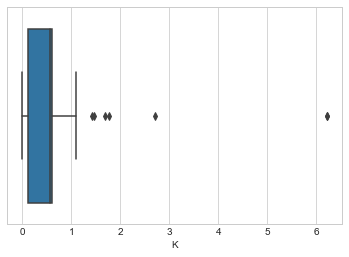

In [25]:
sns.boxplot(x=df['K'])

<AxesSubplot:xlabel='Ca'>

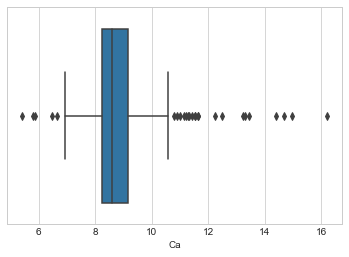

In [26]:
sns.boxplot(x=df['Ca'])

<AxesSubplot:xlabel='Ba'>

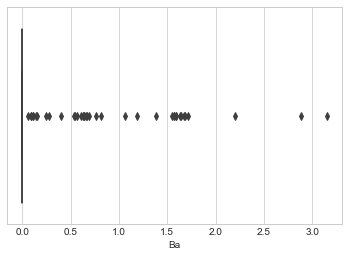

In [27]:
sns.boxplot(x=df['Ba'])

<AxesSubplot:xlabel='Fe'>

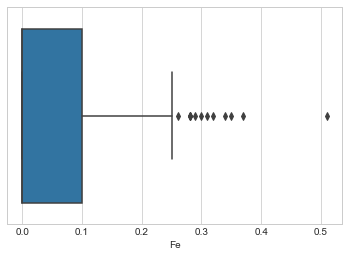

In [28]:
sns.boxplot(x=df['Fe'])

We can see there are outliers present in all elements with the exception of Mg

We can perform a feature transformation by removing the outliers present in all of the individual elements. This would produce better results on a classification model as the model won't be affected by the presence of outlying data points.